# Basecase

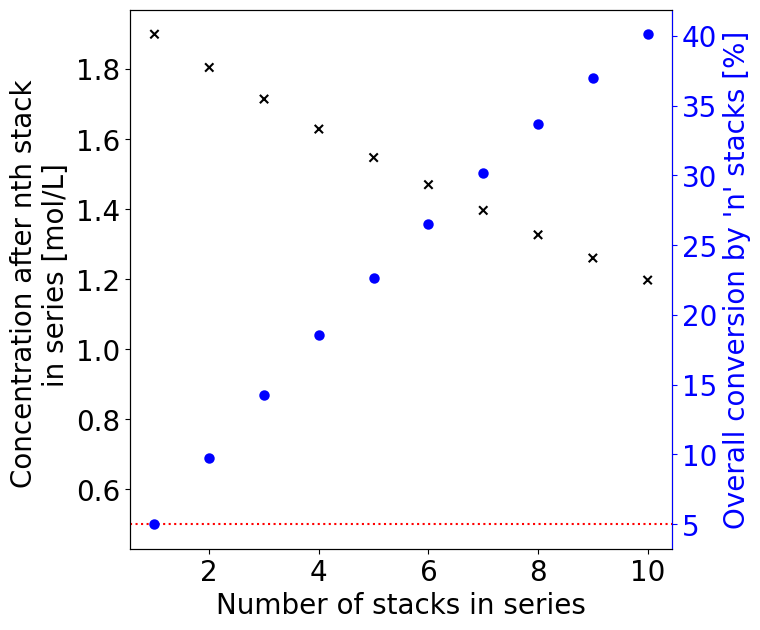

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import set_matplotlib_formats

#---------------------------------------------------------------- reation conditions
ethy = 2000000 ### TPA
FEC2H4 = 0.5      ### ethylene
FEC2H5OH = 0.2;
J = 0.5         ### A/cm2
V = 3.5       ### V
MW = 28       ### MW ethylene
n = 12        ### electrons per mol of C2H4
C0 = 120      ### 2M initial conc for [H]CO3

plt.rcParams.update({'font.size': 20})

#---------------------------------------------------------------- concentration variation with Nseries'
C0=120  # 2 M K2CO3 
Xdash = 0.05
stackseries=10
Cn = np.zeros(stackseries)
stacks = np.linspace(0, stackseries-1, stackseries)

conv = np.zeros(stackseries)
rate = np.zeros(stackseries)
prod = np.zeros(stackseries)

plt.rcParams.update({'font.size': 20})

stackseries=10
for i in range(stackseries):  ### 'i' refers to the no of stacks connected in series
    ### the increased of value kT when adding stacks for rate of prod euqal to 100 ||el stacks   
    rN = Xdash/(1-Xdash)
    Cn[i] = (C0/(1+rN)**(i+1))/60
    conv[i] = (1 - (1/(1+rN)**(i+1)))*100 

fig, ax = plt.subplots(figsize =(7,7))

ax2 = ax.twinx()
# plt.rcParams.update({'font.size': 15})
col = np.where(Cn<0.5,'r','k')
ax.scatter(stacks[ : 10]+1, Cn[ : 10], ls = '-', linewidth =1.5, c=col[:10], marker ='x', label= "Concentration")
ax2.scatter(stacks[:10]+1, conv[:10], ls = '-', linewidth =1.5, c='blue', label = "Conversion")
# ax.legend(loc=0, bbox_to_anchor=(1, 0.9))
# ax2.legend(loc=0, bbox_to_anchor=(0.963, 0.85))

ax.set_xlabel("Number of stacks in series", fontsize = 20)
ax.set_ylabel("Concentration after nth stack \n in series [mol/L]", fontsize = 20)
ax.axhline(y=0.5,color='r',ls=":", label='2-stack rate')

ax2.set_ylabel("Overall conversion by 'n' stacks [%]", c= 'blue', fontsize = 20)

ax2.spines['right'].set_color('blue')
ax2.yaxis.label.set_color('blue') 
ax2.tick_params(axis='y', colors='blue')
plt.show()
fig.savefig('Fig_3e.eps', format='eps', dpi=600, bbox_inches = 'tight')

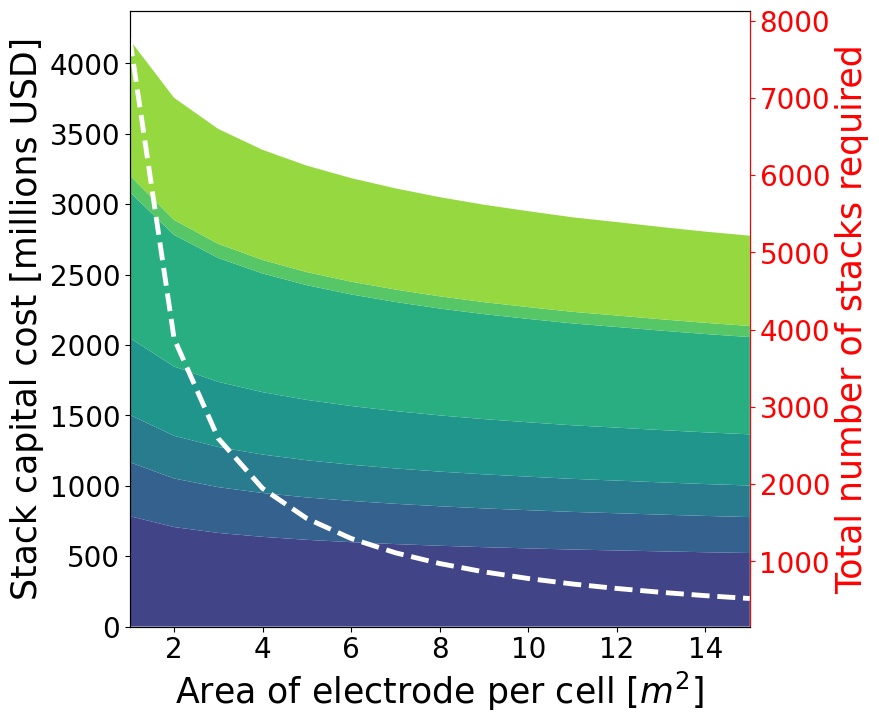

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#---------------------------------------------------------------- stack design parameters
cellperst = 150
areapercel = np.linspace(1,15,15)          ### m2
areaperst = areapercel* cellperst            ### m2
powerprst = areaperst*V*J*10000/1000     ### kWh
stacktot = np.zeros(len(areapercel))
cost = np.zeros(len(areapercel))
X = 0.35    ### conversion FOR n-stack system

Itot = (2000000* 1000/ 28/ 365/ 86400)* 12 *96485 *1000 /0.5/0.9
Atot = Itot/J/10000
power = Itot * V/1000 ### in kW

for o in range(len(areapercel)):
    stacktot[o] = round(Atot/areaperst[o])   ### No of stacks reqd
    
#---------------------------------------------------------------- observations: 1x rate and 40% conv(1-stack value)

part_coeff = [194.7371361, 95.1714818, 83.5651965, 135.5265756, 257.659476, 29.3912632, 239.0894003]

stackcost = np.zeros((len(areapercel), len(part_coeff)))

for i in range(len(stacktot)):  ### 'i' refers to the no of stacks connected in series
    for j in range(len(part_coeff)):
        stackcost[i,j] = part_coeff[j]*(areaperst[i]/0.0961)**0.85/1000000*stacktot[i]
    cost[i] = (sum(stackcost[i,:]))

#-------------------------------------------------------------------- colors for the stackplot
# user to specify
source = ['Cooling plates', 'Stack assembly', 'Frame', 'Cathode GDL', 'BPM', 'Anode GDL', 'Bipolar plates'] # list of units to be stacked
pct_max = 95 # for example, max percentile of color ramp
pct_min = 20 # for example, min percentile of color ramp
ramp = plt.cm.viridis # for example

# number of items in data source
n = len(source)

# list of values between 0.00 and 1.00; length equals length of data source
n_prop = list(i / 100.0 for i in (np.arange(pct_min, pct_max, (pct_max-pct_min)/n)))

# create list of colors
clr_lst = []
for i in n_prop:
    clr = ramp(i) 
    clr_lst.append(clr)
    
fig, ax = plt.subplots(figsize =(8,8))
ax2 = ax.twinx()

ax.stackplot(areapercel, stackcost[:,0], stackcost[:,1], stackcost[:,2], stackcost[:,3], stackcost[:,4], stackcost[:,5], stackcost[:,6], labels = ['Cooling plates', 'Stack assembly', 'Frame', 'Cathode GDL', 'BPM', 'Anode GDL', 'Bipolar plates'], colors =clr_lst)
#ax.set_ylim(0,12000)
# ax.scatter(areapercel, cost, c='red', label = 'Total cost of electrolyzer stacks')
# ax.legend()
ax2.plot(areapercel, stacktot, ls = '--', linewidth =3.5, c='w')

ax.set_xlabel("Area of electrode per cell $[m^2]$", fontsize =25)
ax.set_ylabel("Stack capital cost [millions USD]", fontsize =25)
ax2.set_ylabel("Total number of stacks required", c = 'r', fontsize =25)

ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red') 
ax2.tick_params(axis='y', colors='red')
ax.margins(x=0)

plt.show()
fig.savefig('Fig_3b.eps', format='eps', dpi=600, bbox_inches = 'tight')

# Optimisitic

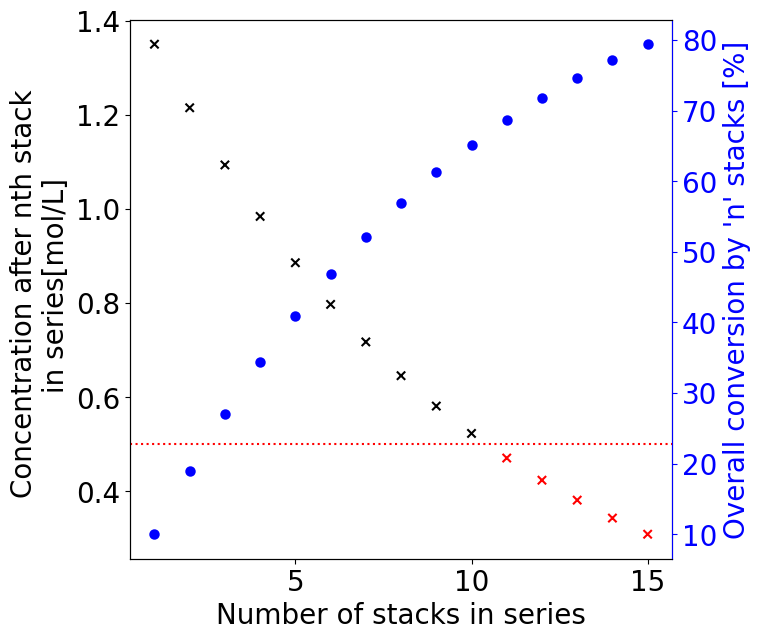

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#---------------------------------------------------------------- reation conditions
ethy = 2000000 ### TPA
FEC2H4 = 0.65      ### ethylene
FEC2H5OH = 0.25;
J = 1         ### A/cm2
V = 3.5       ### V
MW = 28       ### MW ethylene
n = 12        ### electrons per mol of C2H4
C0 = 90      ### 1.5 M initial conc for [H]CO3

plt.rcParams.update({'font.size': 20})

#---------------------------------------------------------------- stack design parameters
cellperst = 150
areapercel = 6                   ### m2
areaperst = cellperst* areapercel ### m2

X = 0.1
#---------------------------------------------------------------- concentration variation with Nseries'
C0=90  # 1.5 M K2CO3 
Xdash = X
stackseries=15
Cn = np.zeros(stackseries)
stacks = np.linspace(0, stackseries-1, stackseries)

conv = np.zeros(stackseries)
rate = np.zeros(stackseries)
prod = np.zeros(stackseries)

plt.rcParams.update({'font.size': 20})

for i in range(stackseries):  ### 'i' refers to the no of stacks connected in series
    ### the increased of value kT when adding stacks for rate of prod euqal to 100 ||el stacks   
    rN = Xdash/(1-Xdash)
    Cn[i] = (C0/(1+rN)**(i+1))/60
    conv[i] = (1 - (1/(1+rN)**(i+1)))*100 

fig, ax = plt.subplots(figsize =(7,7))
ax2 = ax.twinx()
# plt.rcParams.update({'font.size': 15})
col = np.where(Cn<0.5,'r','k')
ax.scatter(stacks[ : 15]+1, Cn[ : 15], ls = '-', linewidth =1.5, c=col[:15], marker ='x', label= "Concentration")
ax2.scatter(stacks[:15]+1, conv[:15], ls = '-', linewidth =1.5, c='blue', label = "Conversion")
# ax.legend(loc=0, bbox_to_anchor=(1, 0.9))
# ax2.legend(loc=0, bbox_to_anchor=(0.963, 0.85))

ax.set_xlabel("Number of stacks in series", fontsize = 20)
ax.set_ylabel("Concentration after nth stack \n in series[mol/L]", fontsize = 20)
ax.axhline(y=0.5,color='r',ls=":", label='2-stack rate')
ax2.set_ylabel("Overall conversion by 'n' stacks [%]", c= 'blue', fontsize = 20)

ax2.spines['right'].set_color('blue')
ax2.yaxis.label.set_color('blue') 
ax2.tick_params(axis='y', colors='blue')
plt.show()
fig.savefig('Fig_3f.eps', format='eps', dpi=600, bbox_inches = 'tight')

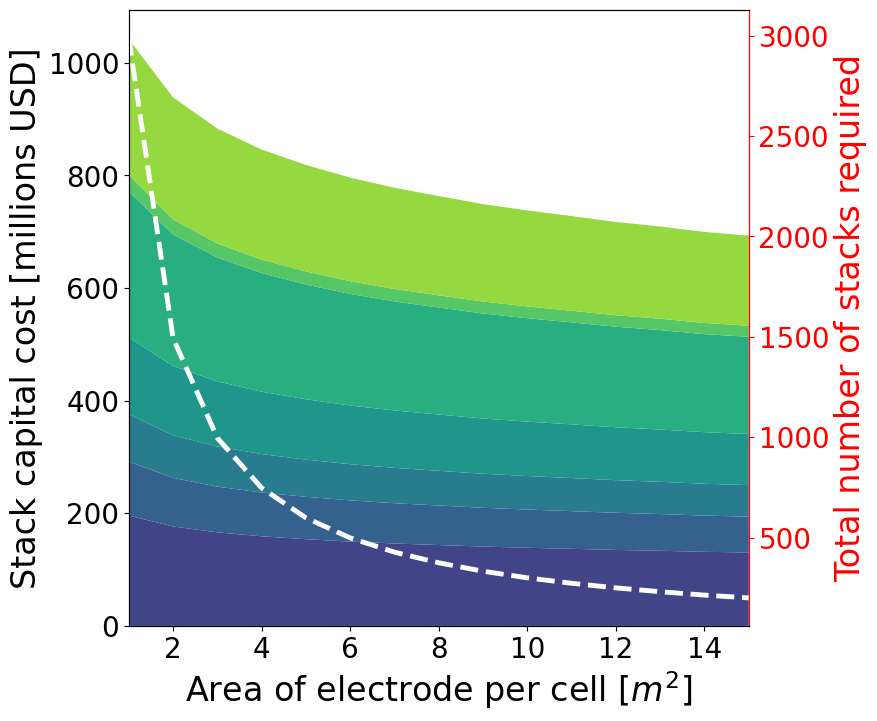

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#---------------------------------------------------------------- reation conditions
ethy = 2000000 ### TPA
FEC2H4 = 0.65      ### ethylene
FEC2H5OH = 0.25;
J = 1         ### A/cm2
V = 3.5       ### V
MW = 28       ### MW ethylene
n = 12        ### electrons per mol of C2H4
C0 = 90      ### 2M initial conc for [H]CO3
X = 0.65    ### conversion FOR n-stack system

plt.rcParams.update({'font.size': 20})

Itot = (2000000* 1000/ 28/ 365/ 86400)* 12 *96485 *1000 /0.65/0.9
Atot = Itot/J/10000
power = Itot * V/1000 ### in kW

#---------------------------------------------------------------- stack design parameters
cellperst = 150
areapercel = np.linspace(1,15,15)          ### m2
areaperst = areapercel* cellperst            ### m2
powerprst = areaperst*V*J*10000/1000     ### kWh
stacktot = np.zeros(len(areapercel))
cost = np.zeros(len(areapercel))


for o in range(len(areapercel)):
    stacktot[o] = round(Atot/areaperst[o])   ### No of stacks reqd
    
#---------------------------------------------------------------- observations: 1x rate and 40% conv(1-stack value)

part_coeff = [194.7371361, 95.1714818, 83.5651965, 135.5265756, 257.659476, 29.3912632, 239.0894003]

stackcost = np.zeros((len(areapercel), len(part_coeff)))

for i in range(len(stacktot)):  ### 'i' refers to the no of stacks connected in series
    for j in range(len(part_coeff)):
        stackcost[i,j] = part_coeff[j]*(areaperst[i]/0.0961)**0.85/1000000*stacktot[i]*0.65
    cost[i] = (sum(stackcost[i,:]))

#-------------------------------------------------------------------- colors for the stackplot
# user to specify
source = ['Cooling plates', 'Stack assembly', 'Frame', 'Cathode GDL', 'BPM', 'Anode GDL', 'Bipolar plates'] # list of units to be stacked
pct_max = 95 # for example, max percentile of color ramp
pct_min = 20 # for example, min percentile of color ramp
ramp = plt.cm.viridis # for example

# number of items in data source
n = len(source)

# list of values between 0.00 and 1.00; length equals length of data source
n_prop = list(i / 100.0 for i in (np.arange(pct_min, pct_max, (pct_max-pct_min)/n)))

# create list of colors
clr_lst = []
for i in n_prop:
    clr = ramp(i) 
    clr_lst.append(clr)
    
fig, ax = plt.subplots(figsize =(8,8))
ax2 = ax.twinx()

ax.stackplot(areapercel, stackcost[:,0], stackcost[:,1], stackcost[:,2], stackcost[:,3], stackcost[:,4], stackcost[:,5], stackcost[:,6], labels = ['Cooling plates', 'Stack assembly', 'Frame', 'Cathode GDL', 'BPM', 'Anode GDL', 'Bipolar plates'], colors =clr_lst)
# ax.scatter(areapercel, cost, c='red', label = 'Total cost of electrolyzer stacks')
# ax.legend()
ax2.plot(areapercel, stacktot, ls = '--', linewidth =3.5, c='w')

ax.set_xlabel("Area of electrode per cell $[m^2]$", fontsize =24)
ax.set_ylabel("Stack capital cost [millions USD]", fontsize =24)
ax2.set_ylabel("Total number of stacks required", c = 'r', fontsize =24)

ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red') 
ax2.tick_params(axis='y', colors='red')
ax.margins(x=0)

plt.show()
fig.savefig('Fig_3c.eps', format='eps', dpi=600, bbox_inches = 'tight')

# pessimistic

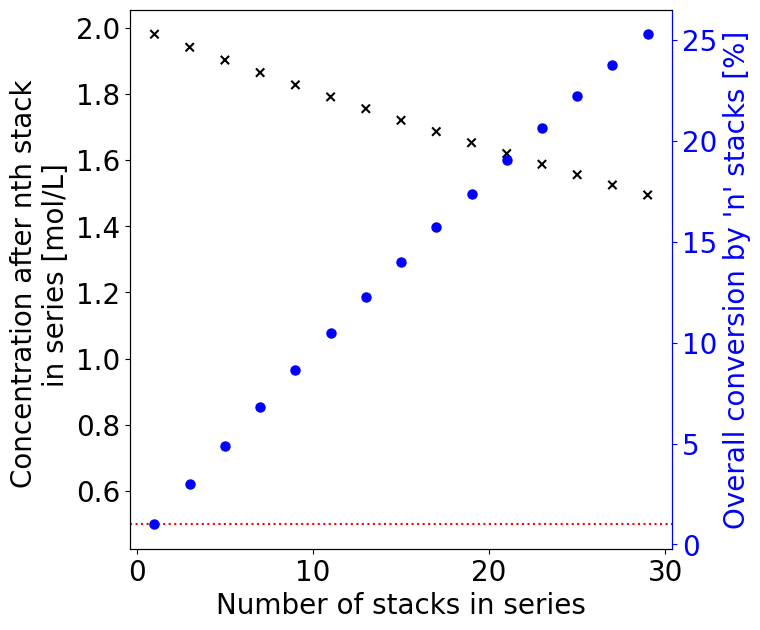

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#---------------------------------------------------------------- reation conditions
ethy = 2000000 ### TPA
FEC2H4 = 0.34      ### ethylene
FEC2H5OH = 0.13;
J = 0.3         ### A/cm2
V = 3.5       ### V
MW = 28       ### MW ethylene
n = 12        ### electrons per mol of C2H4
C0 = 120      ### 2M initial conc for [H]CO3

plt.rcParams.update({'font.size': 20})

#---------------------------------------------------------------- concentration variation with Nseries'
C0=120  # 2 M K2CO3 
Xdash = 0.01
stackseries=30
Cn = np.zeros(stackseries)
stacks = np.linspace(0, stackseries-1, stackseries)

conv = np.zeros(stackseries)
rate = np.zeros(stackseries)
prod = np.zeros(stackseries)

plt.rcParams.update({'font.size': 20})

for i in range(stackseries):  ### 'i' refers to the no of stacks connected in series
    ### the increased of value kT when adding stacks for rate of prod euqal to 100 ||el stacks   
    rN = Xdash/(1-Xdash)
    Cn[i] = (C0/(1+rN)**(i+1))/60
    conv[i] = (1 - (1/(1+rN)**(i+1)))*100 

fig, ax = plt.subplots(figsize =(7,7))
ax2 = ax.twinx()
# plt.rcParams.update({'font.size': 15})
col = np.where(Cn<0.5,'r','k')
ax.scatter(stacks[ : :2]+1, Cn[ : :2], ls = '-', linewidth =1.5, c=col[::2], marker ='x', label= "Concentration")
ax2.scatter(stacks[::2]+1, conv[::2], ls = '-', linewidth =1.5, c='blue', label = "Conversion")
# ax.legend(loc=0, bbox_to_anchor=(1, 0.9))
# ax2.legend(loc=0, bbox_to_anchor=(0.963, 0.85))

ax.set_xlabel("Number of stacks in series", fontsize = 20)
ax.set_ylabel("Concentration after nth stack \n in series [mol/L]", fontsize = 20)
ax.axhline(y=0.5,color='r',ls=":", label='2-stack rate')
ax2.set_ylabel("Overall conversion by 'n' stacks [%]", c= 'blue', fontsize = 20)

ax2.spines['right'].set_color('blue')
ax2.yaxis.label.set_color('blue') 
ax2.tick_params(axis='y', colors='blue')
plt.show()
fig.savefig('Fig_3d.eps', format='eps', dpi=600, bbox_inches = 'tight')

In [6]:
stacks[:10:2]

array([0., 2., 4., 6., 8.])

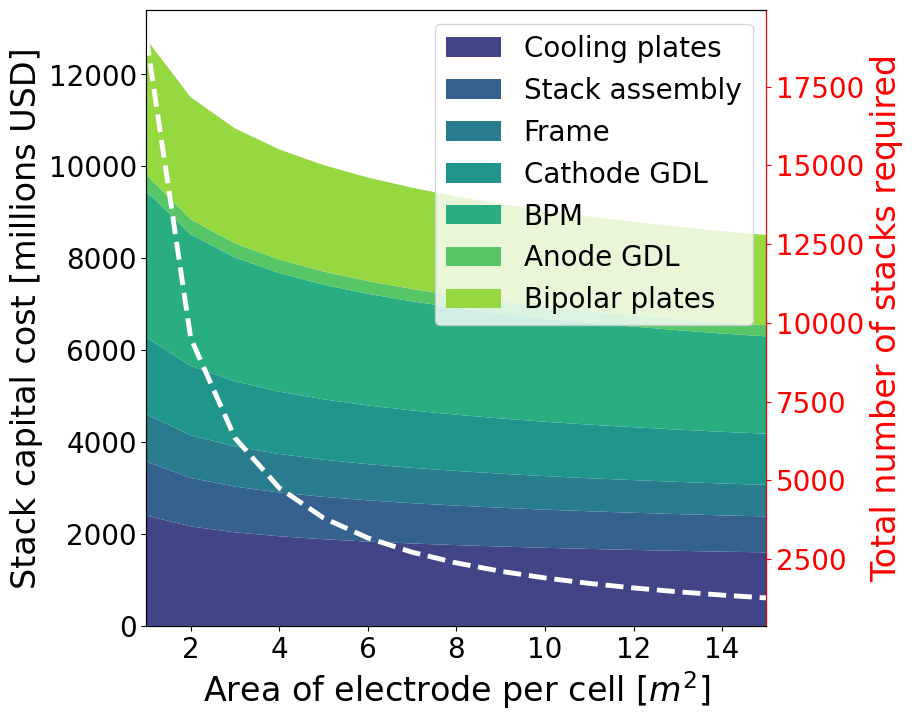

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#---------------------------------------------------------------- reation conditions
ethy = 2000000 ### TPA
FEC2H4 = 0.34      ### ethylene
FEC2H5OH = 0.13;
J = 0.3         ### A/cm2
V = 3.5       ### V
MW = 28       ### MW ethylene
n = 12        ### electrons per mol of C2H4
C0 = 90      ### 2M initial conc for [H]CO3
X = 0.2    ### conversion FOR n-stack system

plt.rcParams.update({'font.size': 20})

Itot = (2000000* 1000/ 28/ 365/ 86400)* 12 *96485 *1000 /0.34/0.9
Atot = Itot/J/10000
power = Itot * V/1000 ### in kW

#---------------------------------------------------------------- stack design parameters
cellperst = 150
areapercel = np.linspace(1,15,15)          ### m2
areaperst = areapercel* cellperst            ### m2
powerprst = areaperst*V*J*10000/1000     ### kWh
stacktot = np.zeros(len(areapercel))
cost = np.zeros(len(areapercel))


for o in range(len(areapercel)):
    stacktot[o] = round(Atot/areaperst[o])   ### No of stacks reqd
    
#---------------------------------------------------------------- observations: 1x rate and 40% conv(1-stack value)

part_coeff = [194.7371361, 95.1714818, 83.5651965, 135.5265756, 257.659476, 29.3912632, 239.0894003]

stackcost = np.zeros((len(areapercel), len(part_coeff)))

for i in range(len(stacktot)):  ### 'i' refers to the no of stacks connected in series
    for j in range(len(part_coeff)):
        stackcost[i,j] = part_coeff[j]*(areaperst[i]/0.0961)**0.85/1000000*stacktot[i]*1.25
    cost[i] = (sum(stackcost[i,:]))

#-------------------------------------------------------------------- colors for the stackplot
# user to specify
source = ['Cooling plates', 'Stack assembly', 'Frame', 'Cathode GDL', 'BPM', 'Anode GDL', 'Bipolar plates'] # list of units to be stacked
pct_max = 95 # for example, max percentile of color ramp
pct_min = 20 # for example, min percentile of color ramp
ramp = plt.cm.viridis # for example

# number of items in data source
n = len(source)

# list of values between 0.00 and 1.00; length equals length of data source
n_prop = list(i / 100.0 for i in (np.arange(pct_min, pct_max, (pct_max-pct_min)/n)))

# create list of colors
clr_lst = []
for i in n_prop:
    clr = ramp(i) 
    clr_lst.append(clr)
    
fig, ax = plt.subplots(figsize =(8,8))
ax2 = ax.twinx()

ax.stackplot(areapercel, stackcost[:,0], stackcost[:,1], stackcost[:,2], stackcost[:,3], stackcost[:,4], stackcost[:,5], stackcost[:,6], labels = ['Cooling plates', 'Stack assembly', 'Frame', 'Cathode GDL', 'BPM', 'Anode GDL', 'Bipolar plates'], colors =clr_lst)
# ax.scatter(areapercel, cost, c='red', label = 'Total cost of electrolyzer stacks')
ax.legend()
ax2.plot(areapercel, stacktot, ls = '--', linewidth =3.5, c='w')

ax.set_xlabel("Area of electrode per cell $[m^2]$", fontsize =24)
ax.set_ylabel("Stack capital cost [millions USD]", fontsize =24)
ax2.set_ylabel("Total number of stacks required", c = 'r', fontsize =24)

ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red') 
ax2.tick_params(axis='y', colors='red')
ax.margins(x=0)

plt.show()
fig.savefig('Fig_3a.eps', format='eps', dpi=600, bbox_inches = 'tight')

In [8]:
Atot

2856694.005185365

# Econometrics

In [1]:
soln = [1.5951, 2.2515, 2.8752, 6.2648, 11.2924, 44.3516, 79.9439, 174.1944, 313.9855, 565.9592,\
0.6084, 0.8587, 1.0966, 2.3895, 4.3070, 16.9160, 30.4912, 66.4390, 119.7564, 215.8611,\
8.9003, 11.8670, 14.8338, 35.6010, 68.2353, 332.2761, 661.5854, 1.6495e+03, 3.2961e+03, 6.5892e+03,\
0.0100, 0.0141, 0.0180, 0.0392, 0.0706, 0.2773, 0.4998, 1.0889, 1.9628, 3.5380,\
4.8695, 6.4677, 7.9106, 15.0233, 24.4054, 75.2948, 122.3167, 232.2971, 377.3678, 613.0358,\
0.0284, 0.0400, 0.0511, 0.1114, 0.2008, 0.7888, 1.4219, 3.0982, 5.5845, 10.0660,\
4.7924, 6.3899, 7.9874, 19.1698, 36.7421, 178.9179, 356.2383, 888.1995, 1.7748e+03, 3.5480e+03,\
7.8460, 6.5320, 5.8340, 4.5940, 3.9880, 3.2460, 3.0540, 2.8620, 2.7500, 2.6580]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


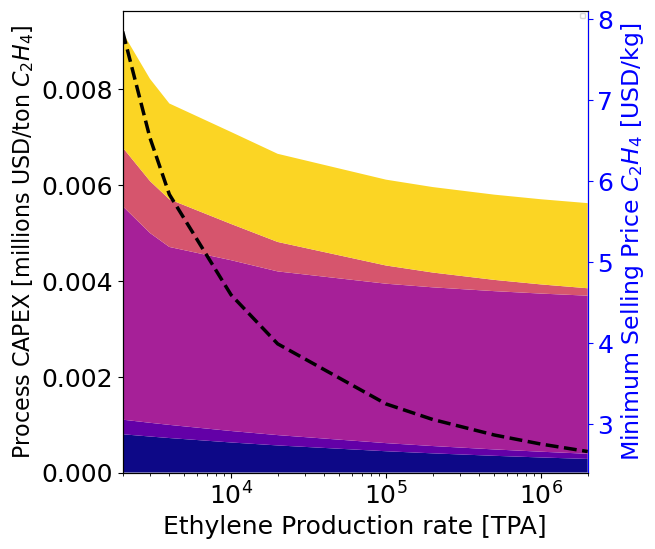

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [2]:
#----------------------------------------------------------------------------------------- base case scenario

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# user to specify
source = ['Carbon Capture Unit', 'GO membrane concentrator', 'Electrolyzer', 'Cathode product separation', 'Anode product separation', 'Balance of Plant'] # list of units to be stacked
pct_max = 110 # for example, max percentile of color ramp
pct_min = 0 # for example, min percentile of color ramp
ramp = plt.cm.plasma # for example


plt.rcParams.update({'font.size': 20})

# number of items in data source
n = len(source)

# list of values between 0.00 and 1.00; length equals length of data source
n_prop = list(i / 100.0 for i in (np.arange(pct_min, pct_max, (pct_max-pct_min)/n)))

# create list of colors
clr_lst = []
for j in n_prop:
    clr = ramp(j) 
    clr_lst.append(clr)

fig, ax = plt.subplots(figsize =(6,6))
ax2 = ax.twinx()

prodrate = [2000, 3000, 4000, 10000, 20000, 100000, 200000, 500000, 1000000, 2000000]

CCU = np.zeros(len(prodrate))
GO =  np.zeros(len(prodrate))
elec =  np.zeros(len(prodrate))
cath_sep =  np.zeros(len(prodrate))
zhf_sep =  np.zeros(len(prodrate))
anod_sep =  np.zeros(len(prodrate))
pervap =  np.zeros(len(prodrate))
distl =  np.zeros(len(prodrate))
bop =  np.zeros(len(prodrate))

soln1 = np.resize(soln,(8,len(prodrate)))

for pp in range(len(prodrate)):
    soln1[:7,pp] = soln1[:7,pp]/prodrate[pp]

CCU= soln1[0,:]
GO= soln1[1,:]
elec=soln1[2,:]
zhf_sep= soln1[3,:]
distl = soln1[4,:]/2
bop= soln1[6,:]
breakeven = soln1[7,:]

for pp in range(len(prodrate)):
    cath_sep[pp] =distl[pp]+pervap[pp]+zhf_sep[pp] #5
    anod_sep[pp] = bop[pp]/10000

ax.stackplot(prodrate, CCU, GO, elec, cath_sep, anod_sep, bop, colors =clr_lst)
ax.margins(x=0)
ax.legend(fontsize=4)
ax.set_xscale('log')

ax2.plot(prodrate, breakeven, ls = '--', linewidth =2.5, c='black')

ax2.margins(x=0)
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')

ax2.set_ylabel("Minimum Selling Price $C_{2}H_{4}$ [USD/kg]", c = 'blue', fontsize =17)
ax2.spines['right'].set_color('blue')

ax.set_xlabel("Ethylene Production rate [TPA]", fontsize =18)
ax.set_ylabel("Process CAPEX [millions USD/ton $C_{2}H_{4}$]", fontsize =16)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
plt.show()
fig.savefig('Fig_3h.eps', format='eps', dpi=600, bbox_inches = 'tight')

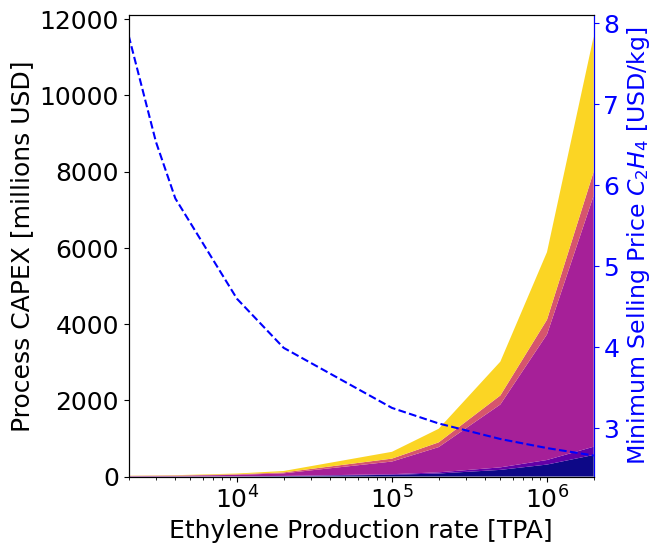

In [3]:
#----------------------------------------------------------------------------------------- base case scenario

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# user to specify
source = ['Carbon Capture Unit', 'GO membrane concentrator', 'Electrolyzer', 'Cathode product separation', 'Anode product separation', 'Balance of Plant'] # list of units to be stacked
pct_max = 110 # for example, max percentile of color ramp
pct_min = 0 # for example, min percentile of color ramp
ramp = plt.cm.plasma # for example


plt.rcParams.update({'font.size': 20})

# number of items in data source
n = len(source)

# list of values between 0.00 and 1.00; length equals length of data source
n_prop = list(i / 100.0 for i in (np.arange(pct_min, pct_max, (pct_max-pct_min)/n)))

# create list of colors
clr_lst = []
for j in n_prop:
    clr = ramp(j) 
    clr_lst.append(clr)

fig, ax = plt.subplots(figsize =(6,6))
ax2 = ax.twinx()

prodrate = [2000, 3000, 4000, 10000, 20000, 100000, 200000, 500000, 1000000, 2000000]

CCU = np.zeros(len(prodrate))
GO =  np.zeros(len(prodrate))
elec =  np.zeros(len(prodrate))
cath_sep =  np.zeros(len(prodrate))
zhf_sep =  np.zeros(len(prodrate))
anod_sep =  np.zeros(len(prodrate))
pervap =  np.zeros(len(prodrate))
distl =  np.zeros(len(prodrate))
bop =  np.zeros(len(prodrate))

soln = np.resize(soln,(8,len(prodrate)))

CCU= soln[0,:]
GO= soln[1,:]
elec=soln[2,:]
zhf_sep= soln[3,:]
distl = soln[4,:]
pervap= soln[5,:]
bop= soln[6,:]

for pp in range(len(prodrate)):
    cath_sep[pp] =distl[pp]+pervap[pp]+zhf_sep[pp] #5
    anod_sep[pp] = bop[pp]/10000
    
breakeven = soln[7,:]

ax.stackplot(prodrate, CCU, GO, elec, cath_sep, anod_sep, bop, labels=source, colors =clr_lst)
ax.margins(x=0)
#ax.legend(fontsize=4)
ax.set_xscale('log')
#ax.legend(loc='center left')
# ax.set_yscale('log')

ax2.plot(prodrate, breakeven, ls = '--', linewidth =1.5, c='blue')

ax2.margins(x=0)
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')

ax2.set_ylabel("Minimum Selling Price $C_{2}H_{4}$ [USD/kg]", c = 'blue', fontsize =17)
ax2.spines['right'].set_color('blue')

ax.set_xlabel("Ethylene Production rate [TPA]", fontsize =18)
ax.set_ylabel("Process CAPEX [millions USD]", fontsize =18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
plt.show()

# Pessimistic

In [12]:
soln = [20.9506, 29.5715, 37.7634, 45.6505, 82.2850, 148.3188, 582.5331, 1.0500e+03, 2.2879e+03, 4.1240e+03, 7.4335e+03,\
110.0271, 155.3021, 198.3240, 239.7446, 432.1398, 778.9324, 3.0593e+03, 5.5144e+03, 1.2016e+04, 2.1658e+04, 3.9039e+04,\
20.6460, 31.7631, 41.2921, 50.8210, 101.6421, 201.6960, 1.0085e+03, 2.0170e+03, 5.0424e+03, 1.0083e+04, 2.0165e+04,\
0.0304, 0.0429, 0.0547, 0.0662, 0.1193, 0.2150, 0.8445, 1.5222, 3.3168, 5.9784, 10.7762,\
52.9493, 70.3273, 86.0164, 100.5583, 163.3575, 265.3751, 818.7270, 1.3300e+03, 2.5259e+03, 4.1034e+03, 6.6659e+03,\
0.1652, 0.2331, 0.2977, 0.3599, 0.6487, 1.1692, 4.5923, 8.2776, 18.0365, 32.5108, 58.6007,\
11.1171, 17.1032, 22.2342, 27.3652, 54.7303, 108.6055, 543.0276, 1.0861e+03, 2.7151e+03, 5.4294e+03, 1.0858e+04,\
140.2020, 131.5280, 125.6300, 121.3520, 109.6560, 99.5360, 80.8920, 74.4600, 67.1180, 62.3140, 58.0620]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


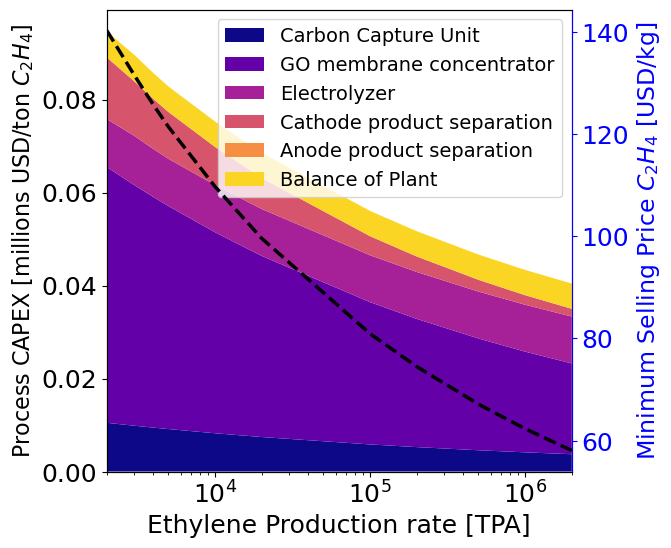

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [13]:
#----------------------------------------------------------------------------------------- pessimistic case scenario

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# user to specify
source = ['Carbon Capture Unit', 'GO membrane concentrator', 'Electrolyzer', 'Cathode product separation', 'Anode product separation', 'Balance of Plant'] # list of units to be stacked
pct_max = 110 # for example, max percentile of color ramp
pct_min = 0 # for example, min percentile of color ramp
ramp = plt.cm.plasma # for example


plt.rcParams.update({'font.size': 20})

# number of items in data source
n = len(source)

# list of values between 0.00 and 1.00; length equals length of data source
n_prop = list(i / 100.0 for i in (np.arange(pct_min, pct_max, (pct_max-pct_min)/n)))

# create list of colors
clr_lst = []
for j in n_prop:
    clr = ramp(j) 
    clr_lst.append(clr)

fig, ax = plt.subplots(figsize =(6,6))
ax2 = ax.twinx()

prodrate = [2000, 3000, 4000, 5000, 10000, 20000, 100000, 200000, 500000, 1000000, 2000000]

CCU = np.zeros(len(prodrate))
GO =  np.zeros(len(prodrate))
elec =  np.zeros(len(prodrate))
cath_sep =  np.zeros(len(prodrate))
zhf_sep =  np.zeros(len(prodrate))
anod_sep =  np.zeros(len(prodrate))
pervap =  np.zeros(len(prodrate))
distl =  np.zeros(len(prodrate))
bop =  np.zeros(len(prodrate))

soln1 = np.resize(soln,(8,len(prodrate)))

for pp in range(len(prodrate)):
    soln1[:7,pp] = soln1[:7,pp]/prodrate[pp]

CCU= soln1[0,:]
GO= soln1[1,:]
elec=soln1[2,:]
zhf_sep= soln1[3,:]
distl = soln1[4,:]/2
bop= soln1[6,:]
breakeven = soln1[7,:]

for pp in range(len(prodrate)):
    cath_sep[pp] =distl[pp]+pervap[pp]+zhf_sep[pp] #5
    anod_sep[pp] = bop[pp]/10000

ax.stackplot(prodrate, CCU, GO, elec, cath_sep, anod_sep, bop, colors =clr_lst)
ax.margins(x=0)
ax.legend(fontsize=4)
ax.set_xscale('log')
ax.legend(source, fontsize = 14)
ax2.plot(prodrate, breakeven, ls = '--', linewidth =2.5, c='black')

ax2.margins(x=0)
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')

ax2.set_ylabel("Minimum Selling Price $C_{2}H_{4}$ [USD/kg]", c = 'blue', fontsize =17)
ax2.spines['right'].set_color('blue')

ax.set_xlabel("Ethylene Production rate [TPA]", fontsize =18)
ax.set_ylabel("Process CAPEX [millions USD/ton $C_{2}H_{4}$]", fontsize =16)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
plt.show()
fig.savefig('Fig_3g.eps', format='eps', dpi=600, bbox_inches = 'tight')

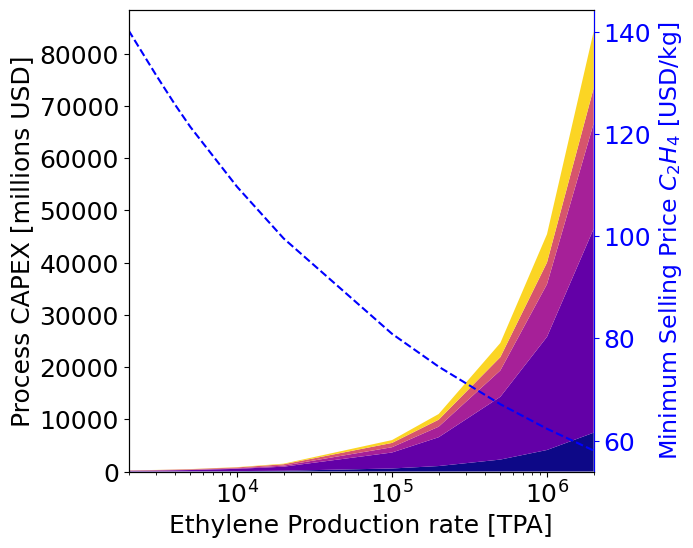

In [14]:
#----------------------------------------------------------------------------------------- pessimistic case scenario

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# user to specify
source = ['Carbon Capture Unit', 'GO membrane concentrator', 'Electrolyzer', 'Cathode product separation', 'Anode product separation', 'Balance of Plant'] # list of units to be stacked
pct_max = 110 # for example, max percentile of color ramp
pct_min = 0 # for example, min percentile of color ramp
ramp = plt.cm.plasma # for example


plt.rcParams.update({'font.size': 20})

# number of items in data source
n = len(source)

# list of values between 0.00 and 1.00; length equals length of data source
n_prop = list(i / 100.0 for i in (np.arange(pct_min, pct_max, (pct_max-pct_min)/n)))

# create list of colors
clr_lst = []
for j in n_prop:
    clr = ramp(j) 
    clr_lst.append(clr)

fig, ax = plt.subplots(figsize =(6,6))
ax2 = ax.twinx()

prodrate = [2000, 3000, 4000, 5000, 10000, 20000, 100000, 200000, 500000, 1000000, 2000000]

CCU = np.zeros(len(prodrate))
GO =  np.zeros(len(prodrate))
elec =  np.zeros(len(prodrate))
cath_sep =  np.zeros(len(prodrate))
zhf_sep =  np.zeros(len(prodrate))
anod_sep =  np.zeros(len(prodrate))
pervap =  np.zeros(len(prodrate))
distl =  np.zeros(len(prodrate))
bop =  np.zeros(len(prodrate))

soln = np.resize(soln,(8,len(prodrate)))

CCU= soln[0,:]
GO= soln[1,:]
elec=soln[2,:]
zhf_sep= soln[3,:]
distl = soln[4,:]
pervap= soln[5,:]
bop= soln[6,:]

for pp in range(len(prodrate)):
    cath_sep[pp] =distl[pp]+pervap[pp]+zhf_sep[pp] #5
    anod_sep[pp] = bop[pp]/10000
    
breakeven = soln[7,:]

ax.stackplot(prodrate, CCU, GO, elec, cath_sep, anod_sep, bop, labels=source, colors =clr_lst)
ax.margins(x=0)
#ax.legend(fontsize=4)
ax.set_xscale('log')
#ax.legend(loc='center left')
# ax.set_yscale('log')

ax2.plot(prodrate, breakeven, ls = '--', linewidth =1.5, c='blue')

ax2.margins(x=0)
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')

ax2.set_ylabel("Minimum Selling Price $C_{2}H_{4}$ [USD/kg]", c = 'blue', fontsize =17)
ax2.spines['right'].set_color('blue')

ax.set_xlabel("Ethylene Production rate [TPA]", fontsize =18)
ax.set_ylabel("Process CAPEX [millions USD]", fontsize =18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
plt.show()

# Optimistic

In [15]:
soln = [1.0068, 1.4210, 1.8147, 2.1937, 3.9542, 7.1274, 27.9934, 50.4581, 109.9461, 198.1779, 357.2158,\
0.4896, 0.6910, 0.8824, 1.0667, 1.9228, 3.4658, 13.6121, 24.5358, 53.4626, 96.3664, 173.7005,\
4.0107, 4.0107, 4.0107, 4.0107, 8.0214, 16.0427, 80.2136, 160.4271, 401.0678, 798.1250, 1.5922e+03,\
0.0019, 0.0027, 0.0035, 0.0042, 0.0076, 0.0137, 0.0539, 0.0971, 0.2117, 0.3815, 0.6877,\
3.7863, 5.0290, 6.1509, 7.1908, 11.6815, 18.9766, 58.5461, 95.1085, 180.6248, 293.4258, 476.6716,\
0.0177, 0.0249, 0.0318, 0.0385, 0.0694, 0.1251, 0.4912, 0.8855, 1.9294, 3.4777, 6.2685,\
2.1596, 2.1596, 2.1596, 2.1596, 4.3192, 8.6384, 43.1919, 86.3838, 215.9596, 429.7596, 857.3596,\
5.5520, 4.2000, 3.4940, 3.0540, 2.3440, 1.9020, 1.3480, 1.2080, 1.0680, 0.9840, 0.9180]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


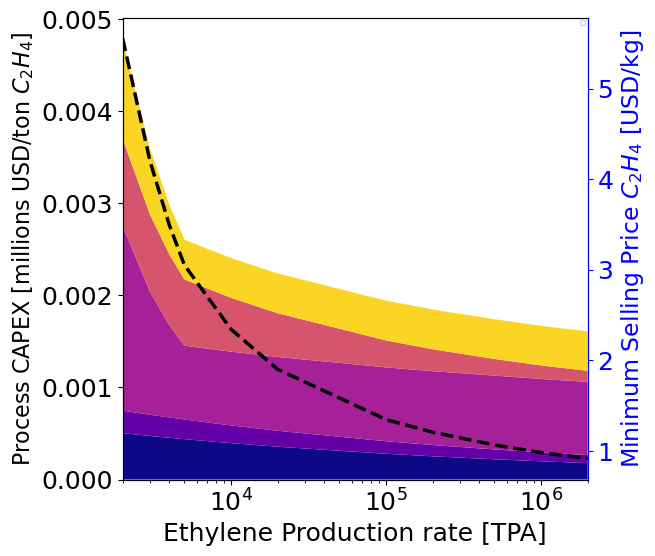

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [16]:
#----------------------------------------------------------------------------------------- optimistic case scenario

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# user to specify
source = ['Carbon Capture Unit', 'GO membrane concentrator', 'Electrolyzer', 'Cathode product separation', 'Anode product separation', 'Balance of Plant'] # list of units to be stacked
pct_max = 110 # for example, max percentile of color ramp
pct_min = 0 # for example, min percentile of color ramp
ramp = plt.cm.plasma # for example


plt.rcParams.update({'font.size': 20})

# number of items in data source
n = len(source)

# list of values between 0.00 and 1.00; length equals length of data source
n_prop = list(i / 100.0 for i in (np.arange(pct_min, pct_max, (pct_max-pct_min)/n)))

# create list of colors
clr_lst = []
for j in n_prop:
    clr = ramp(j) 
    clr_lst.append(clr)

fig, ax = plt.subplots(figsize =(6,6))
ax2 = ax.twinx()

prodrate = [2000, 3000, 4000, 5000, 10000, 20000, 100000, 200000, 500000, 1000000, 2000000]

CCU = np.zeros(len(prodrate))
GO =  np.zeros(len(prodrate))
elec =  np.zeros(len(prodrate))
cath_sep =  np.zeros(len(prodrate))
zhf_sep =  np.zeros(len(prodrate))
anod_sep =  np.zeros(len(prodrate))
pervap =  np.zeros(len(prodrate))
distl =  np.zeros(len(prodrate))
bop =  np.zeros(len(prodrate))

soln1 = np.resize(soln,(8,len(prodrate)))

for pp in range(len(prodrate)):
    soln1[:7,pp] = soln1[:7,pp]/prodrate[pp]

CCU= soln1[0,:]
GO= soln1[1,:]
elec=soln1[2,:]
zhf_sep= soln1[3,:]
distl = soln1[4,:]/2
bop= soln1[6,:]
breakeven = soln1[7,:]

for pp in range(len(prodrate)):
    cath_sep[pp] =distl[pp]+pervap[pp]+zhf_sep[pp] #5
    anod_sep[pp] = bop[pp]/10000

ax.stackplot(prodrate, CCU, GO, elec, cath_sep, anod_sep, bop, colors =clr_lst)
ax.margins(x=0)
ax.legend(fontsize=4)
ax.set_xscale('log')

ax2.plot(prodrate, breakeven, ls = '--', linewidth =2.5, c='black')

ax2.margins(x=0)
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')

ax2.set_ylabel("Minimum Selling Price $C_{2}H_{4}$ [USD/kg]", c = 'blue', fontsize =17)
ax2.spines['right'].set_color('blue')

ax.set_xlabel("Ethylene Production rate [TPA]", fontsize =18)
ax.set_ylabel("Process CAPEX [millions USD/ton $C_{2}H_{4}$]", fontsize =16)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
plt.show()
fig.savefig('Fig_3i.eps', format='eps', dpi=600, bbox_inches = 'tight')

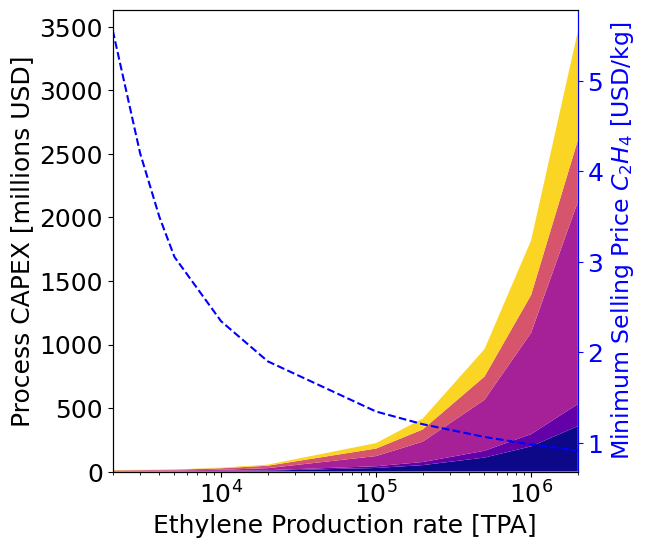

In [17]:
#----------------------------------------------------------------------------------------- optimistic case scenario

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# user to specify
source = ['Carbon Capture Unit', 'GO membrane concentrator', 'Electrolyzer', 'Cathode product separation', 'Anode product separation', 'Balance of Plant'] # list of units to be stacked
pct_max = 110 # for example, max percentile of color ramp
pct_min = 0 # for example, min percentile of color ramp
ramp = plt.cm.plasma # for example


plt.rcParams.update({'font.size': 20})

# number of items in data source
n = len(source)

# list of values between 0.00 and 1.00; length equals length of data source
n_prop = list(i / 100.0 for i in (np.arange(pct_min, pct_max, (pct_max-pct_min)/n)))

# create list of colors
clr_lst = []
for j in n_prop:
    clr = ramp(j) 
    clr_lst.append(clr)

fig, ax = plt.subplots(figsize =(6,6))
ax2 = ax.twinx()

prodrate = [2000, 3000, 4000, 5000, 10000, 20000, 100000, 200000, 500000, 1000000, 2000000]

CCU = np.zeros(len(prodrate))
GO =  np.zeros(len(prodrate))
elec =  np.zeros(len(prodrate))
cath_sep =  np.zeros(len(prodrate))
zhf_sep =  np.zeros(len(prodrate))
anod_sep =  np.zeros(len(prodrate))
pervap =  np.zeros(len(prodrate))
distl =  np.zeros(len(prodrate))
bop =  np.zeros(len(prodrate))

soln = np.resize(soln,(8,len(prodrate)))

CCU= soln[0,:]
GO= soln[1,:]
elec=soln[2,:]
zhf_sep= soln[3,:]
distl = soln[4,:]
pervap= soln[5,:]
bop= soln[6,:]

for pp in range(len(prodrate)):
    cath_sep[pp] =distl[pp]+pervap[pp]+zhf_sep[pp] #5
    anod_sep[pp] = bop[pp]/10000
    
breakeven = soln[7,:]

ax.stackplot(prodrate, CCU, GO, elec, cath_sep, anod_sep, bop, labels=source, colors =clr_lst)
ax.margins(x=0)
#ax.legend(fontsize=4)
ax.set_xscale('log')
#ax.legend(loc='center left')
# ax.set_yscale('log')

ax2.plot(prodrate, breakeven, ls = '--', linewidth =1.5, c='blue')

ax2.margins(x=0)
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')

ax2.set_ylabel("Minimum Selling Price $C_{2}H_{4}$ [USD/kg]", c = 'blue', fontsize =17)
ax2.spines['right'].set_color('blue')

ax.set_xlabel("Ethylene Production rate [TPA]", fontsize =18)
ax.set_ylabel("Process CAPEX [millions USD]", fontsize =18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
plt.show()